In [31]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading dataset
data = pd.read_csv(r'C:\Users\Talha\Desktop\Sub_Sandwiches_OSAT.csv')
data

,Respondent_Serial,brand,OSAT,Food looks appetizing,Has food that tastes good,Has food I crave,Provides the right proportions of ingredients,Has a wide variety of menu options,Offers healthy/better-for-you menu options,Is making changes to improve their food,...,Decor is current and modern,Restaurant environment is designed for someone like me,Restaurant has curb appeal,Ingredients are fresh,Ingredients are high quality,Offers good quality meats,Offers good quality veggies and toppings,Uses freshly baked bread,They make me feel valued,Place I am happy to be seen
0,2,Subway,4,6.0,5.0,3.0,3.0,4.0,6.0,2.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,6.0,2.0,3.0
1,2,McDonalds,2,5.0,1.0,4.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
2,4,Subway,5,4.0,4.0,4.0,5.0,6.0,6.0,NaN,...,3.0,3.0,3.0,6.0,5.0,5.0,5.0,7.0,4.0,4.0
3,4,McDonalds,6,3.0,5.0,5.0,4.0,2.0,1.0,NaN,...,4.0,5.0,4.0,1.0,1.0,1.0,1.0,NaN,4.0,3.0
4,5,Firehouse Subs,5,5.0,4.0,4.0,4.0,5.0,4.0,4.0,...,5.0,4.0,4.0,3.0,5.0,5.0,4.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,24241,Jersey Mikes,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4198,24287,Subway,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
4199,24287,Panera,3,NaN,4.0,2.0,4.0,5.0,5.0,NaN,...,6.0,3.0,NaN,5.0,4.0,NaN,NaN,4.0,NaN,NaN
4200,24290,Jersey Mikes,4,2.0,6.0,6.0,5.0,3.0,7.0,3.0,...,7.0,6.0,4.0,7.0,3.0,5.0,5.0,6.0,6.0,6.0


In [42]:
target_variable = 'OSAT'

# Extracting features (X) and target variable (y)
X = data.iloc[:,[3]].values  # Features
y = data.iloc[:,2].values  # Target variable
data_clean = data.dropna(subset=[target_variable])

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape


(2788, 1)

In [43]:
y

array([4, 2, 5, ..., 7, 4, 3], dtype=int64)

In [44]:
X_train.shape

(2230, 1)

In [45]:
X_test = X_test.reshape(-1,1) 
X_test.shape
X_train = X_train.reshape(-1,1)
X_train.shape

(2230, 1)

In [46]:
y_train = y_train.reshape(-1,1)
y_train.shape

(2230, 1)

In [47]:
data.dropna(inplace=True)

In [48]:

# Creating a linear regression model
model = LinearRegression()
# Training the model
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 0.9283071275373908


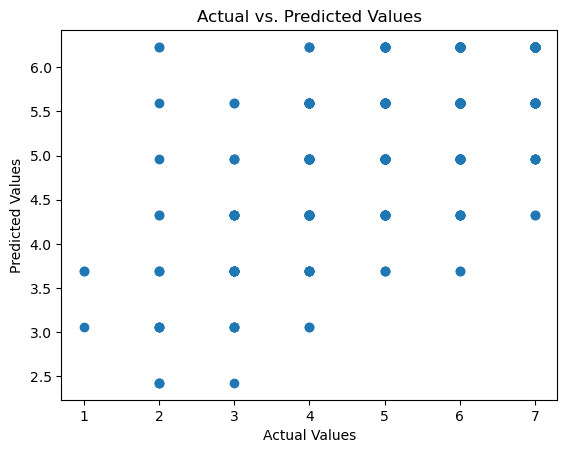

In [49]:
# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualizing the predictions vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# A/B Testing

In [52]:
from scipy import stats

# Metric is measuring the impact
control_group = data[data['brand'] == 'A']['brand']
experimental_group = data[data['OSAT'] == 'B']['OSAT']

# Performing independent two-sample t-test
t_stat, p_value = stats.ttest_ind(control_group, experimental_group, equal_var=False)

# Evaluating the results
if p_value < 0.05:
    print(f"Reject the null hypothesis. There is a significant difference. p-value: {p_value}")
else:
    print(f"Fail to reject the null hypothesis. No significant difference. p-value: {p_value}")


Fail to reject the null hypothesis. No significant difference. p-value: nan
